<h3 align="right"> October 2, 2019  </h3> 

<h3 align="center"> Portfolio Theory and Risk Management I </h3> 

<h3 align="center"> HW 1 Solution.  </h3> 

# 2. Mean-Variance Optimization

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

# 11 ASSET CLASSES + CASH
# Jan 2000 - Sep 2019
data = pd.read_excel('assetclass_data_monthly.xlsx')
data = data.set_index('Dates')

# risk free rate for months w/o given cash returns 
rfr = 0.01/12
data['Cash'].fillna(rfr, inplace = True)

# Calculate the excess returns
data_ex = data.copy()
for asset in data_ex.columns:
    data_ex[asset] = data_ex[asset] - data_ex['Cash'] # can use subtract w/ specifed axis
data_ex.drop(['Cash'], axis=1, inplace=True)
print('Data shape is', data_ex.shape)
data_ex.head(2)

Data shape is (237, 11)


,Domestic Equity,Foreign Equity,Emerging Markets,Private Equity,Absolute Return,High Yield,Commodities,Real Estate,Domestic Bonds,Foreign Bonds,Inflation-Indexed
Dates,,,,,,,,,,,
2000-01-31,-0.050621,NaN,NaN,NaN,NaN,NaN,0.071473,NaN,NaN,NaN,NaN
2000-02-29,-0.016059,NaN,NaN,NaN,NaN,NaN,0.061642,NaN,NaN,NaN,NaN


## 2.1. Summary Statistics

## (a) 
**Calculate and display the ANNUALIZED mean and volatility of each asset's excess return. Volatility = Standard Deviation.**

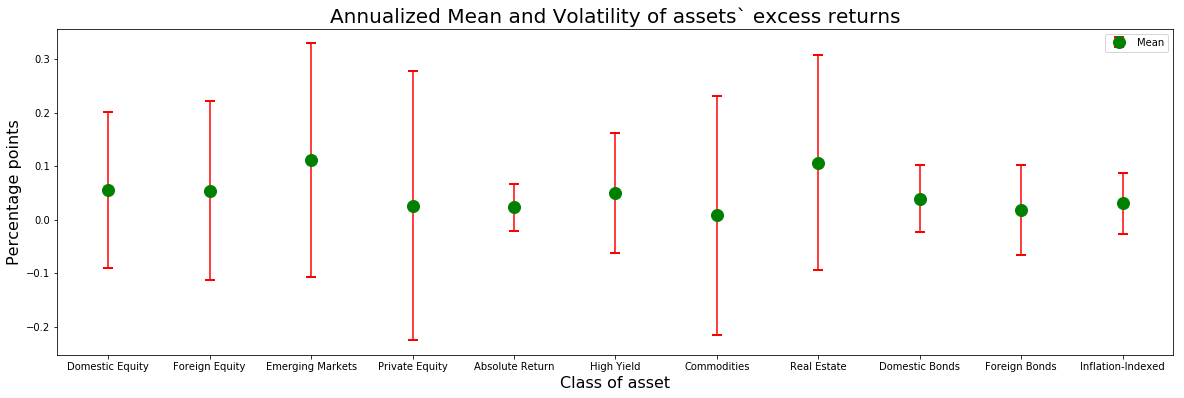

In [386]:
mean = data_ex.mean()*12
std = data_ex.std()*np.sqrt(12)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
ax.errorbar(data_ex.columns.values, mean, std, linestyle='None', marker='o', markersize=12, c='g', 
            ecolor='red', lw=1.5, capsize=5, capthick=2, label='Mean')
ax.set_title('Annualized Mean and Volatility of assets` excess returns', fontsize=20)
plt.xlabel('Class of asset', fontsize=16)
plt.ylabel('Percentage points', fontsize=16)
plt.legend()

In [387]:
printmd("**Annualized mean of each asset class excess return:**\n", color="blue")
print(mean)

printmd("**Annualized standard deviation of each asset class excess return:**\n", color="blue")
print(std)

<span style='color:blue'>**Annualized mean of each asset class excess return:**
</span>

Domestic Equity      0.055121
Foreign Equity       0.053938
Emerging Markets     0.110653
Private Equity       0.026308
Absolute Return      0.023228
High Yield           0.049417
Commodities          0.008010
Real Estate          0.106161
Domestic Bonds       0.039372
Foreign Bonds        0.018323
Inflation-Indexed    0.030167
dtype: float64


<span style='color:blue'>**Annualized standard deviation of each asset class excess return:**
</span>

Domestic Equity      0.145691
Foreign Equity       0.167595
Emerging Markets     0.218556
Private Equity       0.251229
Absolute Return      0.044232
High Yield           0.111721
Commodities          0.223107
Real Estate          0.200801
Domestic Bonds       0.063132
Foreign Bonds        0.084043
Inflation-Indexed    0.056482
dtype: float64


In [388]:
printmd('**The HIGHEST MEAN EXCESS RETURN is {:.4f} and corresponds to {}.**'.format(mean.max(), mean.idxmax()), color='green')
printmd('**The LOWEST MEAN EXCESS RETURN is {:.4f} and corresponds to {}.**'.format(mean.min(), mean.idxmin()), color='red')

print()
print()

printmd('**The HIGHEST VOLATILITY OF EXCESS RETURNS is {:.4f} and corresponds to {}.**'.format(std.max(), std.idxmax()), color='green')
printmd('**The LOWEST VOLATILITY OF EXCESS RETURNS is {:.4f} and corresponds to {}.**'.format(std.min(), std.idxmin()), color='red')

<span style='color:green'>**The HIGHEST MEAN EXCESS RETURN is 0.1107 and corresponds to Emerging Markets.**</span>

<span style='color:red'>**The LOWEST MEAN EXCESS RETURN is 0.0080 and corresponds to Commodities.**</span>

<span style='color:green'>**The HIGHEST VOLATILITY OF EXCESS RETURNS is 0.2512 and corresponds to Private Equity.**</span>

<span style='color:red'>**The LOWEST VOLATILITY OF EXCESS RETURNS is 0.0442 and corresponds to Absolute Return.**</span>

## (b)
**Which assets have the best and worst Sharpe ratios?**

$$Sharpe Ratio_i = \frac{\mathbf{r}_i - \mathbf{r}^f}{\sigma_i} = \frac{\tilde{\mu}_i}{\sigma_i}$$

where 

$r_i$ - return on asset $i$

$r^f$ - risk-free rate, i.e., return on Cash in our case

$\sigma_i$ - standard deviation of asset $i$

**The HIGHER Sharpe Ratio the BETTER**

In [389]:
SR = mean / std # mean and std were annualized when calculated
pd.DataFrame(SR, columns=['Sharpe Ratio'])

,Sharpe Ratio
Domestic Equity,0.378341
Foreign Equity,0.321833
Emerging Markets,0.506290
Private Equity,0.104717
Absolute Return,0.525135
High Yield,0.442330
Commodities,0.035904
Real Estate,0.528689
Domestic Bonds,0.623652
Foreign Bonds,0.218025


In [390]:
# Let us find the highest and the lowest Sharpe Ratios, which correspond to best and worst SR respectively 
printmd('**The BEST Sharpe Ratio is {:.4f} and corresponds to {}.**'.format(SR.max(), SR.idxmax()), color='green')
printmd('**The WORST Sharpe Ratio is {:.4f} and corresponds to {}.**'.format(SR.min(), SR.idxmin()), color='red')

printmd('**This means that Domestic Bonds (Commodities) returns in relation to risk which accompanies investment in them, are the highest (lowest) in comparison to other asset classes.**', color='blue')

#  The ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset. 

<span style='color:green'>**The BEST Sharpe Ratio is 0.6237 and corresponds to Domestic Bonds.**</span>

<span style='color:red'>**The WORST Sharpe Ratio is 0.0359 and corresponds to Commodities.**</span>

<span style='color:blue'>**This means that Domestic Bonds (Commodities) returns in relation to risk which accompanies investment in them, are the highest (lowest) in comparison to other asset classes.**</span>

## 2.2. The MV frontier

## (a)

**Compute and display the weights of the tangency portfolios:** $\mathbf{w}^{tan}$.

$$ \mathbf{w}^{tan} = \frac{ \Sigma^{-1} \tilde{\mathbf{\mu}}  }{  \mathbf{1}^T\Sigma^{-1} \tilde{\mu}  } $$

where 

$\Sigma$ - matrix of pairwise covariances of all asset classes, $dim = 11 \times 11$

$\tilde{\mu}$ - mean excess returns of all asset classes, $dim = 11 \times 1$

$\mathbf{1}$ - all-ones vector, $dim = 11 \times 1$

In [391]:
Sigma = data_ex.cov()*12 # annualize Covariance matrix through multiplication on 12 
inv_Sigma = inv(Sigma)
ones = np.ones(Sigma.shape[1])

w_tan = ( inv_Sigma @ mean ) / ( ones.T @ inv_Sigma @ mean )
printmd('**Tangency portfolio weights:**', color='blue')
display(pd.DataFrame(w_tan, data_ex.columns.values, columns=['w_tan']))
printmd('\nCheck that weights sum to one: {:.4f}'.format(sum(w_tan)), color='blue')

<span style='color:blue'>**Tangency portfolio weights:**</span>

,w_tan
Domestic Equity,-0.038538
Foreign Equity,-0.230462
Emerging Markets,0.191683
Private Equity,0.090221
Absolute Return,0.677437
High Yield,0.301981
Commodities,-0.064875
Real Estate,-0.120223
Domestic Bonds,0.701036
Foreign Bonds,-0.353790


<span style='color:blue'>
Check that weights sum to one: 1.0000</span>

## (b)
**Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to** $\mathbf{w}^{tan}$.

$$ \tilde{\mu}^{tan} = \mathbf{w}^T \tilde{\mu} $$

$$ \sigma_{tan} = \sqrt{\mathbf{w}^T \Sigma \mathbf{w}} $$

$$ SR = \frac{\tilde{\mu}^{tan}}{\sigma_{tan}} $$

In [392]:
tan_portf_mean = (mean @ w_tan)
tan_portf_std = np.sqrt(w_tan.T @ Sigma @ w_tan)
tan_portf_SR = tan_portf_mean / tan_portf_std

printmd('**Tangency portfolio Mean = {:.4f}**'.format(tan_portf_mean), color='blue')
printmd('**Tangency portfolio Volatility = {:.4f} = {:.2f}%**'.format(tan_portf_std, tan_portf_std*100), color='blue')
printmd('**Tangency portfolio Sharpe Ratio = {:.6f}**'.format(tan_portf_SR), color='blue')

<span style='color:blue'>**Tangency portfolio Mean = 0.0429**</span>

<span style='color:blue'>**Tangency portfolio Volatility = 0.0373 = 3.73%**</span>

<span style='color:blue'>**Tangency portfolio Sharpe Ratio = 1.149490**</span>

## 2.3. The Allocation

## (a)

**Compute and display the weights of MV portfolios with target returns of** $\mu^p = 0.005$

$$\mathbf{w}^* = \tilde{\delta} \mathbf{w}^{tan} $$

where

$$ \mathbf{w}^{tan} = \frac{ \Sigma^{-1} \tilde{\mathbf{\mu}}  }{  \mathbf{1}^T\Sigma^{-1} \tilde{\mu}  } $$

$$ \tilde{\delta} = \left( \frac{ \mathbf{1}^T \Sigma^{-1} \tilde{\mu} }{ \tilde{\mu}^T \Sigma^{-1} \tilde{\mu} } \right) \tilde{\mu}^p$$

In [393]:
# Calculate allocation to risky asset classes
target_ret = 0.005*12 # simple compounding --> annualized
delta_tilde = target_ret * ((ones.T @ inv_Sigma @ mean) / (mean.T @ inv_Sigma @ mean))
print('Allocation to risky asset classes = {:.4f} = {:.2f}%'.format(delta_tilde, delta_tilde*100))

MV_weights = delta_tilde * w_tan
printmd('**Mean-Variance portfolio weights:**', color='blue')
display(pd.DataFrame(MV_weights, data_ex.columns.values, columns=['MV weights']))
printmd('\nCheck the sum of MV portfolio weights: {:.4f}'.format(sum(MV_weights)), color='blue')

Allocation to risky asset classes = 1.3998 = 139.98%


<span style='color:blue'>**Mean-Variance portfolio weights:**</span>

,MV weights
Domestic Equity,-0.053945
Foreign Equity,-0.322598
Emerging Markets,0.268316
Private Equity,0.126290
Absolute Return,0.948271
High Yield,0.422711
Commodities,-0.090812
Real Estate,-0.168287
Domestic Bonds,0.981305
Foreign Bonds,-0.495233


<span style='color:blue'>
Check the sum of MV portfolio weights: 1.3998</span>

In [397]:
pos = MV_weights >= 0
neg = MV_weights < 0

print(data_ex.columns.values[pos])
print(MV_weights[pos])

['Emerging Markets' 'Private Equity' 'Absolute Return' 'High Yield'
 'Domestic Bonds']
[0.26831611 0.12629015 0.94827054 0.42271087 0.98130505]


<span style='color:blue'>**Visualization of MV portfolio weights with target monthly return of 0.005:**</span>

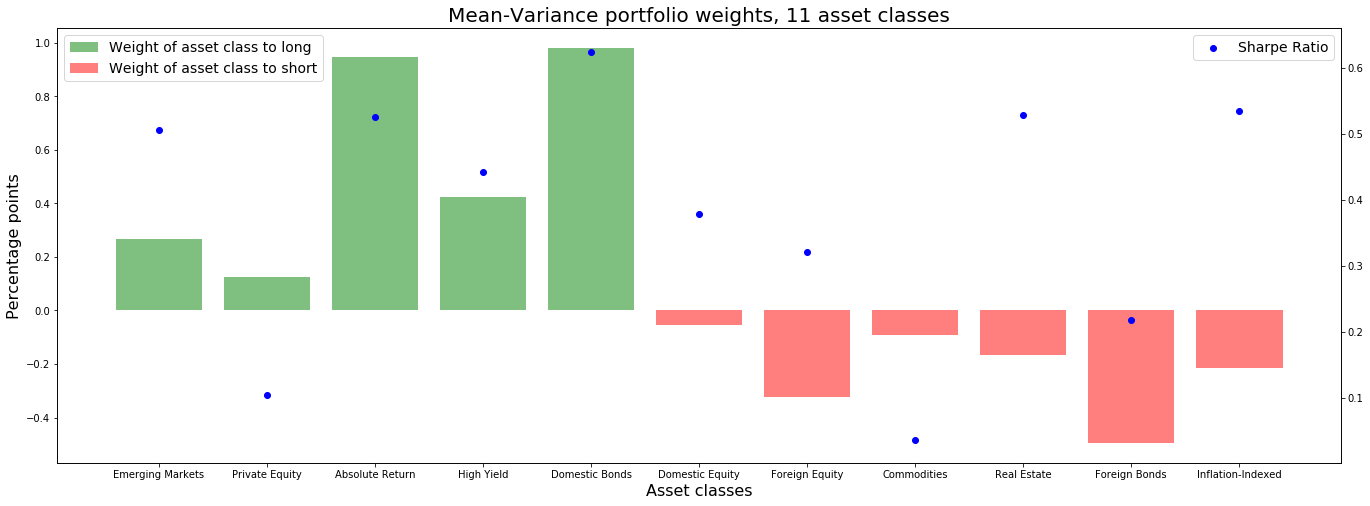

In [401]:
printmd('**Visualization of MV portfolio weights with target monthly return of 0.005:**', color='blue')

pos = MV_weights >= 0
neg = MV_weights < 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(23, 8))
ax.bar(data_ex.columns.values[pos], MV_weights[pos], align='center', color='g', alpha=0.5, label='Weight of asset class to long')
ax.bar(data_ex.columns.values[neg], MV_weights[neg], align='center', color='r', alpha=0.5, label='Weight of asset class to short')
ax.set_title('Mean-Variance portfolio weights, 11 asset classes', fontsize=20)
ax.legend(fontsize=14, loc='upper left')
plt.xlabel('Asset classes', fontsize=16)
plt.ylabel('Percentage points', fontsize=16)

ax2 = ax.twinx()
ax2.scatter(data_ex.columns.values[pos], SR[pos], label='Sharpe Ratio', c='b', marker='o')
ax2.scatter(data_ex.columns.values[neg], SR[neg], c='b', marker='o')
ax2.legend(loc='upper right', fontsize=14)

## (b)

**What is the mean, volatility, and Sharpe ratio for** $\mathbf{w}^p $ ?

In [99]:
wp = MV_weights.copy()

mean_wp = (mean @ wp)
std_wp = np.sqrt(wp.T @ Sigma @ wp)
SR_wp = mean_wp / std_wp

printmd('**MV portfolio Mean = {:.4f}**'.format(mean_wp), color='blue')
printmd('**MV portfolio Volatility = {:.4f} = {:.2f}%**'.format(std_wp, std_wp*100), color='blue')
printmd('**MV portfolio Sharpe Ratio = {:.6f}**'.format(SR_wp), color='blue')

<span style='color:blue'>**MV portfolio Mean = 0.0600**</span>

<span style='color:blue'>**MV portfolio Volatility = 0.0522 = 5.22%**</span>

<span style='color:blue'>**MV portfolio Sharpe Ratio = 1.149490**</span>

## (c)

**Discuss the allocation. In which assets is the portfolio most long? And short?**

In [178]:
df = pd.DataFrame(np.concatenate([np.array(data_ex.columns.values).reshape(mean.shape[0],-1),
                                  np.array(mean).reshape(mean.shape[0],-1), 
                             np.array(std).reshape(std.shape[0], -1), 
                            np.array(SR).reshape(SR.shape[0],-1),
                            np.array(wp).reshape(wp.shape[0],-1)],
                            axis=1),
            columns=['Asset Class','mean', 'std', 'SR', 'wp'])

def color(val):
    if val < 0:
        color = 'red'
    elif val > 0:
        color = 'green'
    return 'background-color: %s' % color

printmd('**The portfolio is LONG in Emerging markets, Private Equity, Absolute Return, High Yield, Domestic Bonds.**', color='green')
printmd('**The portfolio is SHORT in Domestic Equity, Foreign Equity, Commodities, Real Estate, Foreign Bonds, Inflation-Indexed Bonds.**', color='red')

df.style.applymap(color, subset=['wp'])

<span style='color:green'>**The portfolio is LONG in Emerging markets, Private Equity, Absolute Return, High Yield, Domestic Bonds.**</span>

<span style='color:red'>**The portfolio is SHORT in Domestic Equity, Foreign Equity, Commodities, Real Estate, Foreign Bonds, Inflation-Indexed Bonds.**</span>

,Asset Class,mean,std,SR,wp
0,Domestic Equity,0.055121,0.145691,0.378341,-0.0539449
1,Foreign Equity,0.0539376,0.167595,0.321833,-0.322598
2,Emerging Markets,0.110653,0.218556,0.50629,0.268316
3,Private Equity,0.026308,0.251229,0.104717,0.12629
4,Absolute Return,0.0232276,0.0442316,0.525135,0.948271
5,High Yield,0.0494174,0.111721,0.44233,0.422711
6,Commodities,0.00801034,0.223107,0.0359036,-0.0908117
7,Real Estate,0.106161,0.200801,0.528689,-0.168287
8,Domestic Bonds,0.0393722,0.0631317,0.623652,0.981305
9,Foreign Bonds,0.0183234,0.0840428,0.218025,-0.495233


# (d)

**Does this line up with which assets have the strongest Sharpe ratios?**

In [227]:
df = pd.DataFrame(np.concatenate([np.array(data_ex.columns.values).reshape(mean.shape[0],-1),
                            np.array(SR).reshape(SR.shape[0],-1),
                            np.array(wp).reshape(wp.shape[0],-1)],
                            axis=1),
            columns=['Asset Class','SR', 'wp'])

SR_df_mean = df['SR'].mean()
High_SR = []
High_SR_idx = []
High_SR_wp = []
for i in range(df.shape[0]):
    if df['SR'][i] >= SR_df_mean:
        High_SR.append(df['SR'][i])
        High_SR_idx.append(df['Asset Class'][i])
        High_SR_wp.append(df['wp'][i])
        
df_High_SR = pd.DataFrame(np.concatenate([np.array(High_SR_idx).reshape(np.array(High_SR_idx).shape[0],-1),
                            np.array(High_SR).reshape(np.array(High_SR).shape[0],-1),
                            np.array(High_SR_wp).reshape(np.array(High_SR_wp).shape[0],-1)],
                            axis=1),
            columns=['Asset Class','SR', 'wp'])
printmd('Average Sharpe Ratio = {:.4f}'.format(SR_df_mean), color='blue')
printmd('**Table of Asset Classes with higher than average Sharpe Ratio**', color='blue')
display(df_High_SR)
printmd('**No, weights of MV portfolio are not perfectly lined up with Sharpe Ratios!**', color='blue') 
printmd('As we can see from the table above, not all Asset Classes with higher than average Sharpe Ratio are long. Asset Classes with the 2nd and the 3rd highest Sharpe Ratios, i.e., TIPS and Real Estate, are shorted. All other Asset Classes that are long, except of Private Equity, have higher than average Sharpe Ratios, thus, long position on them in portfolio can be explaned by a good trade-off between return and risk. It is reasonable to assume that asset classes with low Sharpe Ratios are long in the portfolio due to diversification reasons.', color='blue')

<span style='color:blue'>Average Sharpe Ratio = 0.3835</span>

<span style='color:blue'>**Table of Asset Classes with higher than average Sharpe Ratio**</span>

,Asset Class,SR,wp
0,Emerging Markets,0.5062899750999017,0.2683161075099527
1,Absolute Return,0.5251350653621121,0.9482705427994356
2,High Yield,0.442330481662613,0.4227108701408934
3,Real Estate,0.5286889417571031,-0.1682871024094634
4,Domestic Bonds,0.6236523761555774,0.9813050487179316
5,Inflation-Indexed,0.5340923105469106,-0.21622562570508125


<span style='color:blue'>**No, weights of MV portfolio are not perfectly lined up with Sharpe Ratios!**</span>

<span style='color:blue'>As we can see from the table above, not all Asset Classes with higher than average Sharpe Ratio are long. Asset Classes with the 2nd and the 3rd highest Sharpe Ratios, i.e., TIPS and Real Estate, are shorted. All other Asset Classes that are long, except of Private Equity, have higher than average Sharpe Ratios, thus, long position on them in portfolio can be explaned by a good trade-off between return and risk. It is reasonable to assume that asset classes with low Sharpe Ratios are long in the portfolio due to diversification reasons.</span>

# 2.4. The allocation w/o inflation-indexed bonds.

## (a)

**Drop the in
ation-indexed bonds from your return array, and recompute** $\mathbf{w}^p$ **as an** $10 \times 1$ **vector allocating to the remaining assets.** 

In [228]:
# Drop inflation-index bonds
data_ex_10 = data_ex.copy()
data_ex_10.drop(['Inflation-Indexed'], axis=1, inplace=True)
# print(data_ex_10.shape)
# data_ex_10.head(2)

# Calculate tangency portfolio for 10 risky asset classes
mean_10 = data_ex_10.mean()*12
std_10 = data_ex_10.std()*np.sqrt(12)
Sigma_10 = data_ex_10.cov()*12
inv_Sigma_10 = inv(Sigma_10)
ones_10 = np.ones(Sigma_10.shape[1])

w_tan_10 = ( inv_Sigma_10 @ mean_10 ) / ( ones_10.T @ inv_Sigma_10 @ mean_10 )
# print('Tangency 10-asset-classes-portfolio weights: \n {} \n'.format(w_tan_10))

# print('Check that weights sum to one: {:.4f}'.format(sum(w_tan_10)))

In [233]:
# Calculate portfolio allocation to risky asset classes
target_ret = 0.005*12
delta_tilde_10 = target_ret * ((ones_10 @ inv_Sigma_10 @ mean_10) / (mean_10.T @ inv_Sigma_10 @ mean_10))
print('Allocation to risky assets = {:.4f} = {:.2f}%'.format(delta_tilde_10, delta_tilde_10*100))

# Calculate MV 10-asset-classes-portfolio weights
MV_weights_10 = delta_tilde_10 * w_tan_10

printmd('**Mean-Variance portfolio weights for 10 assets:**', color='blue')
display(pd.DataFrame(MV_weights_10, data_ex_10.columns.values, columns=['MV weights']))
printmd('\nCheck the sum of MV portfolio weights: {:.4f}'.format(sum(MV_weights_10)), color='blue')

Allocation to risky assets = 1.4969 = 149.69%


<span style='color:blue'>**Mean-Variance portfolio weights for 10 assets:**</span>

,MV weights
Domestic Equity,-0.076868
Foreign Equity,-0.322005
Emerging Markets,0.265913
Private Equity,0.141559
Absolute Return,1.014357
High Yield,0.421139
Commodities,-0.106711
Real Estate,-0.187869
Domestic Bonds,0.879786
Foreign Bonds,-0.532407


<span style='color:blue'>
Check the sum of MV portfolio weights: 1.4969</span>

## (b)

**How does the portfolio compare to the allocation above where inflation-indexed bonds were available?**

<span style='color:blue'>**Comparison of MV portfolios for 10 and 11 asset classes:**</span>

Text(0, 0.5, 'Percentage ponts')

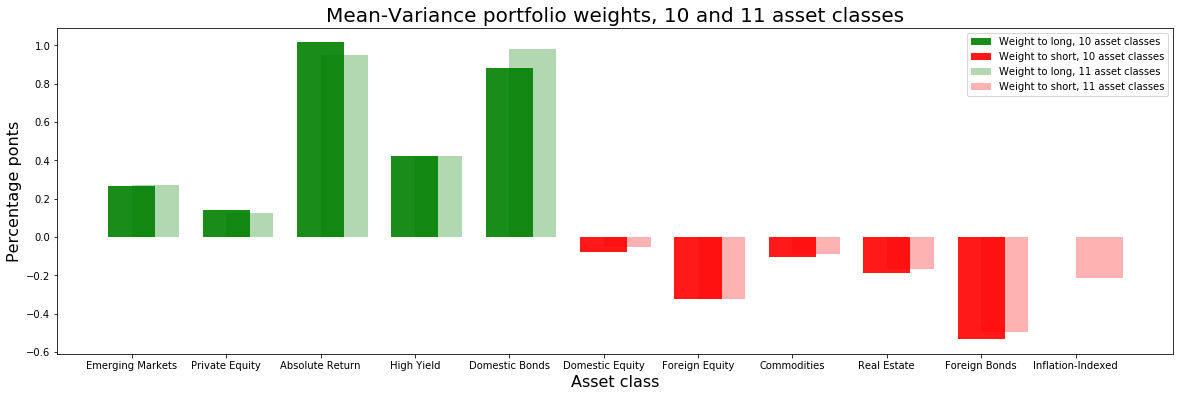

In [236]:
printmd('**Comparison of MV portfolios for 10 and 11 asset classes:**', color='blue')

pos_10 = MV_weights_10 >= 0
neg_10 = MV_weights_10 < 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
ax.bar(data_ex_10.columns.values[pos_10], MV_weights_10[pos_10], align='center', width=0.5, color='g', alpha=0.9, label='Weight to long, 10 asset classes')
ax.bar(data_ex_10.columns.values[neg_10], MV_weights_10[neg_10], align='center', width=0.5, color='r', alpha=0.9, label='Weight to short, 10 asset classes')
ax.bar(data_ex.columns.values[pos], MV_weights[pos], align='edge', width=0.5, color='g', alpha=0.3, label='Weight to long, 11 asset classes')
ax.bar(data_ex.columns.values[neg], MV_weights[neg], align='edge', width=0.5, color='r', alpha=0.3, label='Weight to short, 11 asset classes')
ax.set_title('Mean-Variance portfolio weights, 10 and 11 asset classes', fontsize=20)
ax.legend()
plt.xlabel('Asset class', fontsize=16)
plt.ylabel('Percentage ponts', fontsize=16)

In [241]:
printmd('**As can be seen from the graph above, portfolio for 10 assets (w/o TIPS) s similar to MV portfolio with them. The minor differences that are observable are the following:**', color='blue')
printmd('1) Long positions of the portfolio are now financed through a lttle bit higher short position in Domestic Equity, Commodities, Real Estate and Foreign Bonds;', color='blue')
printmd('2) Long position of the portfolio in Absolute Return asset class has increased, while long position n Domestic Bonds has decreased.', color='blue')
printmd('**All in all, it is reasonable to conclude that exclusion of TIPS from the portfolio has mostly lead to redistribution of short positions, i.e., sources of funding.**', color='blue')

<span style='color:blue'>**As can be seen from the graph above, portfolio for 10 assets (w/o TIPS) s similar to MV portfolio with them. The minor differences that are observable are the following:**</span>

<span style='color:blue'>1) Long positions of the portfolio are now financed through a lttle bit higher short position in Domestic Equity, Commodities, Real Estate and Foreign Bonds;</span>

<span style='color:blue'>2) Long position of the portfolio in Absolute Return asset class has increased, while long position n Domestic Bonds has decreased.</span>

<span style='color:blue'>**All in all, it is reasonable to conclude that exclusion of TIPS from the portfolio has mostly lead to redistribution of short positions, i.e., sources of funding.**</span>

## (c)

**Calculate the Sharpe ratio. How much did it change?**

In [252]:
wp_10 = MV_weights_10

mean_wp_10 = mean_10 @ wp_10
std_wp_10 = np.sqrt(wp_10.T @ Sigma_10 @ wp_10)
SR_wp_10 = mean_wp_10 / std_wp_10

printmd('MV 10-asset-classes-portfolio Mean = {:.4f}'.format(mean_wp_10), color='blue')
printmd('MV 11-asset-classes-portfolio Mean = {:.4f}\n'.format(mean_wp), color='blue')
print()
printmd('MV 10-asset-classes-portfolio Volatility = {:.4f}'.format(std_wp_10), color='blue')
printmd('MV 11-asset-classes-portfolio Volatility = {:.4f}\n'.format(std_wp), color='blue')
print()
printmd('**MV 10-asset-classes-portfolio Sharpe Ratio = {:.4f}**'.format(SR_wp_10), color='blue')
printmd('**MV 11-asset-classes-portfolio Sharpe Ratio = {:.4f}**'.format(SR_wp), color='blue')
print()
printmd('**Sharpe Ratio of 10-asset-classes portfolio is LOWER than Sharpe Ratio of 11-asset-classes portfolio by {:.4f}.**'.format(SR_wp - SR_wp_10), color='blue')
printmd('**Thus, Sharpe Ratio has insignificantly DECREASED!**', color='blue')

<span style='color:blue'>MV 10-asset-classes-portfolio Mean = 0.0600</span>

<span style='color:blue'>MV 11-asset-classes-portfolio Mean = 0.0600
</span>

<span style='color:blue'>MV 10-asset-classes-portfolio Volatility = 0.0527</span>

<span style='color:blue'>MV 11-asset-classes-portfolio Volatility = 0.0522
</span>

<span style='color:blue'>**MV 10-asset-classes-portfolio Sharpe Ratio = 1.1382**</span>

<span style='color:blue'>**MV 11-asset-classes-portfolio Sharpe Ratio = 1.1495**</span>

<span style='color:blue'>**Sharpe Ratio of 10-asset-classes portfolio is LOWER than Sharpe Ratio of 11-asset-classes portfolio by 0.0113.**</span>

<span style='color:blue'>**Thus, Sharpe Ratio has insignificantly DECREASED!**</span>

## (d)

**Do you think inflation-indexed bonds are a significant expansion of the investment opportunity set for an allocator that is optimizing nominal returns, as we are here? Or should it only be relevant to HMC given their focus on inflation-adjusted returns?**

In [261]:
printmd('**It is reasonable to believe that TIPS offer some expansion of the investment opportunity set from the perspective of nominal returns, but not a signifcant one. TIPS offer some expanson as they have the 2nd largest Sharpe Ratio among all available asset classes, and their inclusion into portfolio increases total portoflio Sharpe Ratio.**', color='blue')
printmd('**However, weights of MV portfolio with and without TIPS do not change significantly, i.e., there are no huge changes in MV frontier. Thus, it seems more relevant to consider TIPS as expansion of the portfolio from the perspective of better INFLATION-ADJUSTED RETURNS, but not nominal returns!**', color='blue')

<span style='color:blue'>**It is reasonable to believe that TIPS offer some expansion of the investment opportunity set from the perspective of nominal returns, but not a signifcant one. TIPS offer some expanson as they have the 2nd largest Sharpe Ratio among all available asset classes, and their inclusion into portfolio increases total portoflio Sharpe Ratio.**</span>

<span style='color:blue'>**However, weights of MV portfolio with and without TIPS do not change significantly, i.e., there are no huge changes in MV frontier. Thus, it seems more relevant to consider TIPS as expansion of the portfolio from the perspective of better INFLATION-ADJUSTED RETURNS, but not nominal returns!**</span>

# 2.5. Long-short positions.

## (a)

**Consider an allocation between only domestic and foreign equities. (Drop all other return
columns and recompute** $\mathbf{w}^p$ **for** $\mu^p = 0.005$ **)**

In [265]:
# Select 2 asset classes
data_ex_2 = data_ex[['Domestic Equity', 'Foreign Equity']].copy()

# Calculate tangency portfolio for 2 risky asset classes
mean_2 = data_ex_2.mean()*12
std_2 = data_ex_2.mean()*np.sqrt(12)
Sigma_2 = data_ex_2.cov()*12
inv_Sigma_2 = inv(Sigma_2)
ones_2 = np.ones(Sigma_2.shape[1])

w_tan_2 = ( inv_Sigma_2 @ mean_2 ) / ( ones_2.T @ inv_Sigma_2 @ mean_2 )
# print('Tangency 2-asset-classes-portfolio weights: \n {} \n'.format(w_tan_2))

# print('Check that weights sum to one: {:.4f}'.format(sum(w_tan_2)))

# Calculate portfolio allocation to risky asset classes
target_ret = 0.005*12
delta_tilde_2 = target_ret * ((ones_2 @ inv_Sigma_2 @ mean_2) / (mean_2.T @ inv_Sigma_2 @ mean_2))
print('Allocation to risky assets = {:.4f} = {:.2f}%'.format(delta_tilde_2, delta_tilde_2*100))

# Calculate MV 2-asset-classes-portfolio weights
MV_weights_2 = delta_tilde_2 * w_tan_2

printmd('**Mean-Variance portfolio weights for 2 assets:**', color='blue')
display(pd.DataFrame(MV_weights_2, data_ex_2.columns.values, columns=['MV weights']))
printmd('\nCheck the sum of MV portfolio weights: {:.4f}'.format(sum(MV_weights_2)), color='blue')

Allocation to risky assets = 1.0885 = 108.85%


<span style='color:blue'>**Mean-Variance portfolio weights for 2 assets:**</span>

,MV weights
Domestic Equity,1.090201
Foreign Equity,-0.001723


<span style='color:blue'>
Check the sum of MV portfolio weights: 1.0885</span>

## (b)

**What is causing the extreme long-short position?**

<span style='color:blue'>**Mean-Variance portfolio weights for 2 assets:**</span>

Text(0, 0.5, 'Percentage ponts')

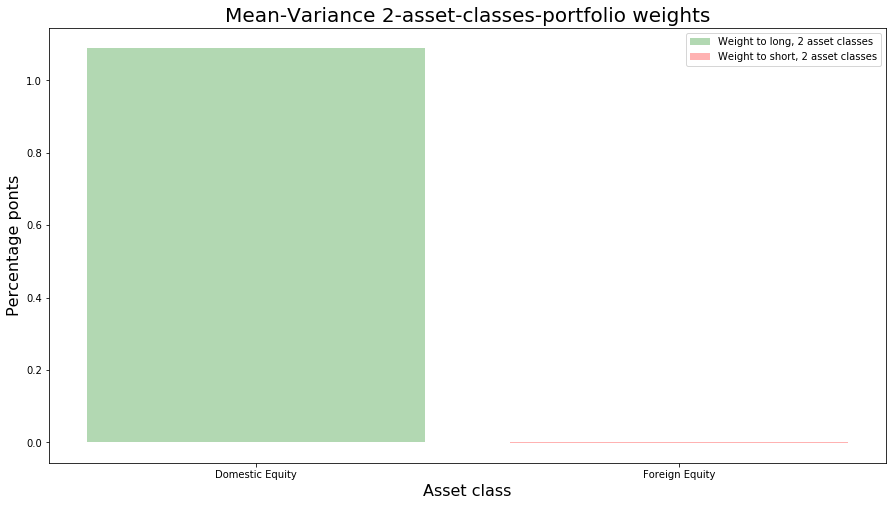

In [266]:
printmd('**Mean-Variance portfolio weights for 2 assets:**', color='blue')

pos_2 = MV_weights_2 >= 0
neg_2 = MV_weights_2 < 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
ax.bar(data_ex_2.columns.values[pos_2], MV_weights_2[pos_2], align='center', color='g', alpha=0.3, 
       label='Weight to long, 2 asset classes')
ax.bar(data_ex_2.columns.values[neg_2], MV_weights_2[neg_2], align='center', color='r', alpha=0.3, 
       label='Weight to short, 2 asset classes')
ax.set_title('Mean-Variance 2-asset-classes-portfolio weights', fontsize=20)
ax.legend()
plt.xlabel('Asset class', fontsize=16)
plt.ylabel('Percentage ponts', fontsize=16)

In [290]:
printmd('Domestic Equity mean = {:.4f}'.format(mean['Domestic Equity']), color='blue')
printmd('Foreign Equity mean = {:.4f}'.format(mean['Foreign Equity']), color='blue')
printmd('Target return = {:.4f}'.format(0.005*12), color='blue')
printmd('Correlation between Foreign and Domestic Equity asset classes = {:.4f}'.format(np.array(data_ex_2.corr())[1][0]), color='blue')
printmd('**We can see that mean annualized return for either of the 2 assets is lower than the target annualized return, and also there is a high correlation between Domestic and Foreign Equity asset classes. This leads to the fact that the only way to achieve target return is to short one asset and long another one with higher Sharpe Ratio.**',color='blue')

<span style='color:blue'>Domestic Equity mean = 0.0551</span>

<span style='color:blue'>Foreign Equity mean = 0.0539</span>

<span style='color:blue'>Target return = 0.0600</span>

<span style='color:blue'>Correlation between Foreign and Domestic Equity asset classes = 0.8694</span>

<span style='color:blue'>**We can see that mean annualized return for either of the 2 assets is lower than the target annualized return, and also there is a high correlation between Domestic and Foreign Equity asset classes. This leads to the fact that the only way to achieve target return is to short one asset and long another one with higher Sharpe Ratio.**</span>

## (c)

**Make an adjustment to** $\mu^{foreign-equities}$ **of** $0.001$. **Recompute** $\mathbf{w}^p$ **for** $\mu^p = 0.005$ **for these two assets**.

In [294]:
# Make returns` adjustment
data_ex_2_adj = data_ex_2.copy()
data_ex_2_adj['Foreign Equity'] = data_ex_2_adj['Foreign Equity'] + 0.001

# Calculate tangency portfolio for 2 risky asset classes
mean_2_adj = data_ex_2_adj.mean()*12
std_2_adj = data_ex_2_adj.std()*np.sqrt(12)
Sigma_2_adj = data_ex_2_adj.cov()*12
inv_Sigma_2_adj = inv(Sigma_2_adj)*12
ones_2_adj = np.ones(Sigma_2_adj.shape[1])

w_tan_2_adj = ( inv_Sigma_2_adj @ mean_2_adj ) / ( ones_2_adj.T @ inv_Sigma_2_adj @ mean_2_adj )
# print('Tangency 2-asset-classes-adjusted-portfolio weights: \n {} \n'.format(w_tan_2_adj))
# print('Check that weights sum to one: {:.4f}'.format(sum(w_tan_2_adj)))

# Calculate portfolio allocation to risky asset classes
target_ret = 0.005*12
delta_tilde_2_adj = target_ret * ((ones_2_adj @ inv_Sigma_2_adj @ mean_2_adj) / (mean_2_adj.T @ inv_Sigma_2_adj @ mean_2_adj))
print('Allocation to risky assets = {:.4f} = {:.2f}%'.format(delta_tilde_2_adj, delta_tilde_2_adj*100))

# Calculate MV 2-asset-classes-portfolio weights
MV_weights_2_adj = delta_tilde_2_adj * w_tan_2_adj

printmd('**Mean-Variance portfolio weights for 2 assets, adjusted:**', color='blue')
display(pd.DataFrame(MV_weights_2_adj, data_ex_2.columns.values, columns=['MV weights adj']))
printmd('\nCheck the sum of MV portfolio adj weights: {:.4f}'.format(sum(MV_weights_2_adj)), color='blue')

Allocation to risky assets = 0.9759 = 97.59%


<span style='color:blue'>**Mean-Variance portfolio weights for 2 assets, adjusted:**</span>

,MV weights adj
Domestic Equity,0.401916
Foreign Equity,0.573967


<span style='color:blue'>
Check the sum of MV portfolio adj weights: 0.9759</span>

<span style='color:blue'>**Mean-Variance portfolio adj weights for 2 assets:**</span>

Text(0, 0.5, 'Percentage points')

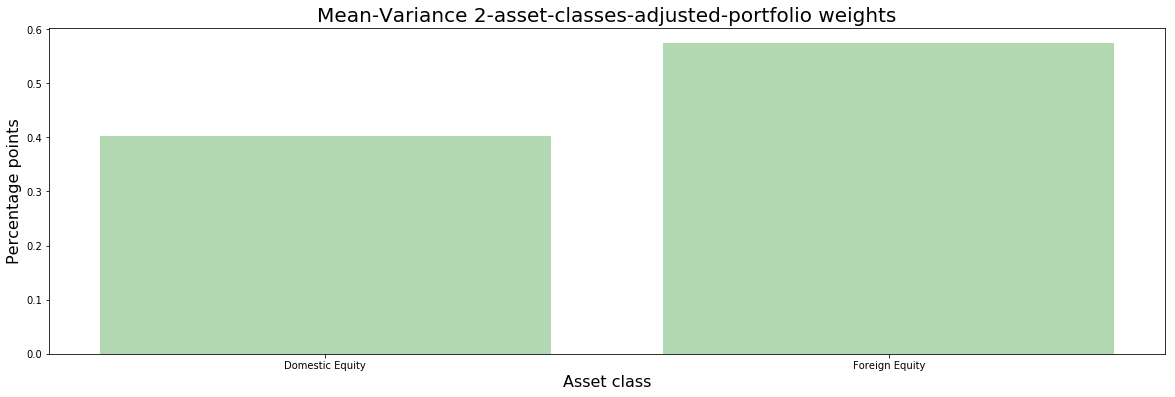

In [296]:
printmd('**Mean-Variance portfolio adj weights for 2 assets:**', color='blue')

pos_2 = MV_weights_2_adj >= 0
neg_2 = MV_weights_2_adj < 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
ax.bar(data_ex_2_adj.columns.values[pos_2], MV_weights_2_adj[pos_2], align='center', color='g', alpha=0.3, 
       label='Weight to long, 2 asset classes')
ax.bar(data_ex_2_adj.columns.values[neg_2], MV_weights_2_adj[neg_2], align='center', color='r', alpha=0.3, 
       label='Weight to short, 2 asset classes')
ax.set_title('Mean-Variance 2-asset-classes-adjusted-portfolio weights', fontsize=20)
plt.xlabel('Asset class', fontsize=16)
plt.ylabel('Percentage points', fontsize=16)

In [302]:
printmd('Domestic Equity mean = {:.4f}'.format(mean_2_adj['Domestic Equity']), color='blue')
printmd('Foreign Equity mean = {:.4f}'.format(mean_2_adj['Foreign Equity']), color='blue')
printmd('Target return = {:.4f}'.format(0.005*12), color='blue')
printmd('Correlation between Foreign and Domestic Equity asset classes = {:.4f}'.format(np.array(data_ex_2_adj.corr())[1][0]), color='blue')
printmd('**The allocation has changed significantly in the way that we are now long in both assets. Foreign equity annualzed mean return is now higher than the target return. Thus, we invest most of the funds in Foreigh Equity, and for dversification purposes we also invest in Domestic Equity.**', color='blue')

<span style='color:blue'>Domestic Equity mean = 0.0551</span>

<span style='color:blue'>Foreign Equity mean = 0.0659</span>

<span style='color:blue'>Target return = 0.0600</span>

<span style='color:blue'>Correlation between Foreign and Domestic Equity asset classes = 0.8694</span>

<span style='color:blue'>**The allocation has changed significantly in the way that we are now long in both assets. Foreign equity annualzed mean return is now higher than the target return. Thus, we invest most of the funds in Foreigh Equity, and for dversification purposes we also invest in Domestic Equity.**</span>

Allocations has changed in the way that now we are **long both Foreign Equity and Domestic Equity** in approximately the same proportion. 

## (d)
**What does this say about the statistical precision of the MV solutions?**

In [306]:
printmd('**We have just seen that a small (1.2%) change in annual returns of one highly correlated assets has led to signifcant changes in MV portfolio weights. Thus, we can say that MV solutions are not statistcally precise and are VERY SENSITIVE to inputs.**', color='blue')

<span style='color:blue'>**We have just seen that a small (1.2%) change in annual returns of one highly correlated assets has led to signifcant changes in MV portfolio weights. Thus, we can say that MV solutions are not statistcally precise and are VERY SENSITIVE to inputs.**</span>

# 2.6. Robustness, 11 asset classes

## (a) 

**Recalculate the 11-asset allocation, again with the unadjusted** $\mu^{foreign-equities}$ **and again for** $\mu^p = 0.005$. **This time, make one change: in building** $\mathbf{w}^{tan}$, **do not use** $\Sigma$ **as given in the formulas in the lecture. Rather, use a diaganolized** $\Sigma^D$ **, which zeroes out all
non-diagonal elements of the full covariance matrix,** $\Sigma$.

In [325]:
mean_11 = data_ex.mean()*12
std_11 = data_ex.std()*np.sqrt(12)
Sigma_11 = data_ex.cov()*12

for i in Sigma_11:
    for j in Sigma_11:
        if i != j:
            Sigma_11[i][j] = 0
Sigma_inv_11 = inv(Sigma_11)
ones_11 = np.ones(Sigma_11.shape[1])

w_tan_11 = ( Sigma_inv_11 @ mean_11 ) / ( ones_11.T @ Sigma_inv_11 @ mean_11 )
# print('Tangency 11-asset-classes-portfolio weights: \n {}'.format(w_tan_11))
# print('Check that weights sum to one: {:.4f}\n'.format(sum(w_tan_11)))

target_ret = 0.005*12

# Calculate portfolio allocation
delta_11 = target_ret * ((ones_11 @ Sigma_inv_11 @ mean_11) / (mean_11.T @ Sigma_inv_11 @ mean_11))
print('Allocation to risky assets = {:.4f} = {:.2f}% \n'.format(delta_11, delta_11*100))

# Calculate portfolio weights
w_p_11 = delta_11 * w_tan_11

printmd('**Mean-Variance portfolio weights for 11 assets:**', color='blue')
display(pd.DataFrame(np.concatenate([np.array(w_p_11).reshape(11,-1), np.array(MV_weights).reshape(11,-1)], axis=1), data_ex.columns.values, columns=['MV weights w/ diag.Sigma', 'MV weights']))
printmd('\nCheck the sum of MV portfolio weights w/ diag.Sigma: {:.4f}'.format(sum(w_p_11)), color='blue')
printmd('\nCheck the sum of MV portfolio weights w/o diag.Sigma: {:.4f}'.format(sum(MV_weights)), color='blue')

Allocation to risky assets = 1.4428 = 144.28% 



<span style='color:blue'>**Mean-Variance portfolio weights for 11 assets:**</span>

,MV weights w/ diag.Sigma,MV weights
Domestic Equity,0.078377,-0.053945
Foreign Equity,0.057958,-0.322598
Emerging Markets,0.069916,0.268316
Private Equity,0.012580,0.126290
Absolute Return,0.358327,0.948271
High Yield,0.119496,0.422711
Commodities,0.004857,-0.090812
Real Estate,0.079465,-0.168287
Domestic Bonds,0.298151,0.981305
Foreign Bonds,0.078297,-0.495233


<span style='color:blue'>
Check the sum of MV portfolio weights w/ diag.Sigma: 1.4428</span>

<span style='color:blue'>
Check the sum of MV portfolio weights w/o diag.Sigma: 1.3998</span>

<span style='color:blue'>**Mean-Variance portfolio weights for 11 assets w/ diag.Sigma:**</span>

Text(0, 0.5, 'Percentage points')

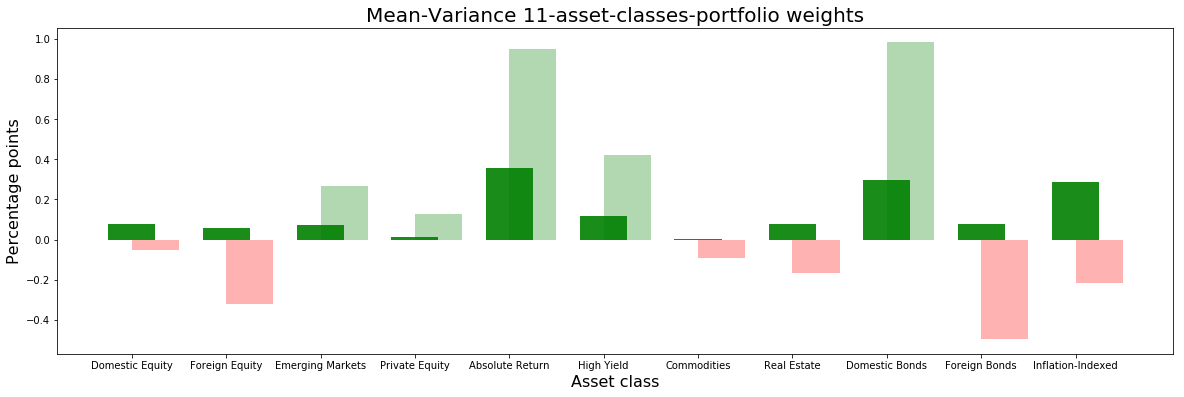

In [343]:
printmd('**Mean-Variance portfolio weights for 11 assets w/ diag.Sigma:**', color='blue')

pos_11 = w_p_11 >= 0
neg_11 = w_p_11 < 0

pos_11_init = MV_weights >= 0
neg_11_init = MV_weights < 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
ax.bar(data_ex.columns.values[pos_11], w_p_11[pos_11], align='center', color='g', alpha=0.9, width=0.5,
       label='Weight to long, 11 asset classes w/ diag.Sigma')
ax.bar(data_ex.columns.values[neg_11], w_p_11[neg_11], align='center', color='r', alpha=0.9, width=0.5,
       label='Weight to short, 11 asset classes w/ diag.Sigma')
ax.bar(data_ex.columns.values[pos_11_init], MV_weights[pos_11_init], align='edge', color='g', alpha=0.3, width=0.5,
       label='Weight to long, 11 asset classes')
ax.bar(data_ex.columns.values[neg_11_init], MV_weights[neg_11_init], align='edge', color='r', alpha=0.3, width=0.5,
       label='Weight to short, 11 asset classes')
ax.set_title('Mean-Variance 11-asset-classes-portfolio weights', fontsize=20)
# ax.legend()
plt.xlabel('Asset class', fontsize=16)
plt.ylabel('Percentage points', fontsize=16)

In [344]:
printmd('**The allocaton has changed in the way that now portfolio consists of long positions only in comparison to initial allocation with half long and half short postions.**', color='blue')

<span style='color:blue'>**The allocaton has changed in the way that now portfolio consists of long positions only in comparison to initial allocation with half long and half short postions.**</span>

## (b)
**What does this suggest about the sensitivity of the solution to estimated means and estimated
covariances?**

In [347]:
printmd('**The change in allocation that we have seen above tells us that solution is very sensitive to estimated covariances. It is also obvious that in case there is no correlation between asset classes, there will be no extreme long-short positons in the portfolio.**', color='blue')

<span style='color:blue'>**The change in allocation that we have seen above tells us that solution is very sensitive to estimated covariances. It is also obvious that in case there is no correlation between asset classes, there will be no extreme long-short positons in the portfolio.**</span>

## (c)
**HMC deals with this sensitivity by using explicit constraints on the allocation vector. Conceptually,
what are the pros/cons of doing that versus modifying the formula with** $\Sigma^D$ **?**

In [407]:
printmd('**PROS of HMC approach is the clear statement of constraints, which will be clear from the first glance. CONS of HMC approach is increased complexity of the optimization problem.**', color='blue')
printmd('**PROS of covariance formula modification is its simplicity and ease of calculatioin. CONS is that it oversimplifies reality, and can lead to biased portfolios at the end.**',color='blue')


<span style='color:blue'>**PROS of HMC approach is the clear statement of constraints, which will be clear from the first glance. CONS of HMC approach is increased complexity of the optimization problem.**</span>

<span style='color:blue'>**PROS of covariance formula modification is its simplicity and ease of calculatioin. CONS is that it oversimplifies reality, and can lead to biased portfolios at the end.**</span>

# 2.6. Robustness, 2 asset classes (old task)

In [40]:
# # Select 2 asset classes
# data_ex_2 = data_ex[['Domestic Equity', 'Foreign Equity']].copy()

# # Calculate tangency portfolio for 2 risky asset classes
# mean_2 = data_ex_2.mean()*12
# std_2 = data_ex_2.std()*np.sqrt(12)
# Sigma_2 = data_ex_2.cov()*12
# for asset in Sigma_2.columns: # convert full Cov matrix into a diagonalized one
#     if asset == 'Domestic Equity':
#         Sigma_2[asset][0] = 0
#     else:
#         Sigma_2[asset][1] = 0

# inv_Sigma_2 = inv(Sigma_2)
# ones_2 = np.ones(Sigma_2.shape[1])

# w_tan_2 = ( inv_Sigma_2 @ mean_2 ) / ( ones_2.T @ inv_Sigma_2 @ mean_2 )
# print('Tangency 2-asset-classes-portfolio weights: \n {}'.format(w_tan_2))
# print('Check that weights sum to one: {:.4f}\n'.format(sum(w_tan_2)))

In [41]:
# target_ret = 0.005*12

# # Calculate portfolio allocation
# delta_2 = target_ret * ((ones_2 @ inv_Sigma_2 @ mean_2) / (mean_2.T @ inv_Sigma_2 @ mean_2))
# print('Allocation to risky assets = {:.4f} = {:.2f}% \n'.format(delta_tilde_2, delta_tilde_2*100))

# # Calculate portfolio weights
# w_p_2 = delta_2 * w_tan_2
# print('MV 2-asset-classes-portfolio weights: \n {}'.format(w_p_2))
# print('Check sum of the weights: {:.4f}\n'.format(sum(w_p_2)))

In [42]:
# pos_2 = w_p_2 >= 0
# neg_2 = w_p_2 < 0

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
# ax.bar(data_ex_2.columns.values[pos_2], w_p_2[pos_2], align='center', color='g', alpha=0.3, 
#        label='Weight to long, 2 asset classes')
# ax.bar(data_ex_2.columns.values[neg_2], w_p_2[neg_2], align='center', color='r', alpha=0.3, 
#        label='Weight to short, 2 asset classes')
# ax.set_title('Mean-Variance 2-asset-classes-portfolio weights', fontsize=20)
# plt.xlabel('Asset class', fontsize=16)
# plt.ylabel('Percentage points', fontsize=16)

# 7. Let's divide the sample to both compute a portfolio and then check its performance out of sample.

## (a)

**Using only data through the end of 2016, compute** $\mathbf{w}^p$ **for** $\mu^p = 0.005$, **allocating to all 11 assets.**

In [351]:
train = data_ex['2000-01-31':'2016-12-31'].copy()
# train.tail(2)

# Calculate weights of tangency portfolio
mean_train = train.mean()*12
std_train = train.std()*np.sqrt(12)
Sigma_train = train.cov()*12
Sigma_inv_train = inv(Sigma_train)
ones_train = np.ones(Sigma_train.shape[1])

w_tan_train = ( Sigma_inv_train @ mean_train ) / ( ones_train.T @ Sigma_inv_train @ mean_train )
# print('Tangency 11-asset-classes-train-portfolio weights: \n {} \n'.format(w_tan_train))

# print('Check that train weights sum to one: {:.4f}'.format(sum(w_tan_train)))

# Calculate delta (i.e., portfolio allocation to risky asset classes)
target_return = 0.005*12
delta_train = target_return * ( ones_train.T @ Sigma_inv_train @ mean_train ) / ( mean_train.T @ Sigma_inv_train @ mean_train )
print('Portfolio allocatoin to risky asset classes = {:.4f}'.format(delta_train))

# Calculate Mean-Variance portfolio weights
wp_train = delta_train * w_tan_train
# print('MV 11-asset-classes-train-portfolio weights: \n {} \n'.format(wp_train))

# print('Check the sum of train-MV-portfolio weights: {:.4f}'.format(sum(wp_train)))

printmd('**Mean-Variance train-portfolio weights for 11 assets:**', color='blue')
display(pd.DataFrame(np.array(wp_train), train.columns.values, columns=['MV train weights']))
printmd('\nCheck the sum of train MV portfolio weights: {:.4f}'.format(sum(wp_train)), color='blue')

Portfolio allocatoin to risky asset classes = 1.1029


<span style='color:blue'>**Mean-Variance train-portfolio weights for 11 assets:**</span>

,MV train weights
Domestic Equity,-0.057625
Foreign Equity,-0.166122
Emerging Markets,0.217092
Private Equity,0.035068
Absolute Return,0.799615
High Yield,0.260768
Commodities,-0.055115
Real Estate,-0.088052
Domestic Bonds,0.726014
Foreign Bonds,-0.514358


<span style='color:blue'>
Check the sum of train MV portfolio weights: 1.1029</span>

## (b)

**Calculate the portfolio's Sharpe ratio within that sample, through the end of 2016.**

In [353]:
mean_wp_train = (mean_train @ wp_train)
std_wp_train = np.sqrt(wp_train.T @ Sigma_train @ wp_train)
SR_wp_train = mean_wp_train / std_wp_train

printmd('**MV train portfolio Mean = {:.4f}**'.format(mean_wp_train), color='blue')
printmd('**MV train portfolio Volatility = {:.4f} = {:.2f}%**'.format(std_wp_train, std_wp_train*100), color='blue')
printmd('**MV train portfolio Sharpe Ratio = {:.6f}**'.format(SR_wp_train), color='blue')

<span style='color:blue'>**MV train portfolio Mean = 0.0600**</span>

<span style='color:blue'>**MV train portfolio Volatility = 0.0457 = 4.57%**</span>

<span style='color:blue'>**MV train portfolio Sharpe Ratio = 1.314084**</span>

## (c)

**Calculate the portfolio's Sharpe ratio based on performance in 2017-2019.**

In [402]:
test = data_ex['2017-01-01':].copy()
# test.head(2)

mean_test = test.mean()*12
std_test = test.std()*np.sqrt(12)
Sigma_test = test.cov()*12

mean_wp_test = (mean_test @ wp_train)
std_wp_test = np.sqrt(wp_train.T @ Sigma_test @ wp_train)
SR_wp_test = mean_wp_test / std_wp_test

printmd('**MV test portfolio Mean = {:.4f}**'.format(mean_wp_test), color='blue')
printmd('**MV test portfolio Volatility = {:.4f} = {:.2f}%**'.format(std_wp_test, std_wp_test*100), color='blue')
printmd('**MV test portfolio Sharpe Ratio = {:.6f}**'.format(SR_wp_test), color='blue')

printmd('**BAD PERFORMANCE on out-of-sample data: lower than required mean return, high volatilty, and low Sharpe Ratio.**',color='blue')

<span style='color:blue'>**MV test portfolio Mean = 0.0487**</span>

<span style='color:blue'>**MV test portfolio Volatility = 0.0518 = 5.18%**</span>

<span style='color:blue'>**MV test portfolio Sharpe Ratio = 0.940188**</span>

<span style='color:blue'>**BAD PERFORMANCE on out-of-sample data: lower than required mean return, high volatilty, and low Sharpe Ratio.**</span>

## (d)

**How does this out-of-sample Sharpe compare to the 2000-2016 performance of a portfolio
optimized to** $\mu^p$ **using 2000-2016 data?**

In [357]:
printmd('**Out-of-sample Sharpe Ratio of {:.4f} is significantly LOWER than in-sample Sharpe Ratio of {:.4f}. It says that portfolio weights calculated on the basis of historical (train) data has low quality prediction ability, i.e., it is not a good idea to simply interpolate historical MV portfolio weights into the future.**'.format(SR_wp_train, SR_wp_test), color='blue')

<span style='color:blue'>**Out-of-sample Sharpe Ratio of 1.3141 is significantly LOWER than in-sample Sharpe Ratio of 0.5761. It says that portfolio weights calculated on the basis of historical (train) data has low quality prediction ability, i.e., it is not a good idea to simply interpolate historical MV portfolio weights into the future.**</span>

## (e)
**How does this out-of-sample Sharpe compare to the 2017-2019 performance of a portfolio
optimized to** $\mu^p$ **using 2017-2019 data?**

In [360]:
# Calculate weights of tangency portfolio
mean_test = test.mean()*12
std_test = test.std()*np.sqrt(12)
Sigma_test = test.cov()*12
Sigma_inv_test = inv(Sigma_test)
ones_test = np.ones(Sigma_test.shape[1])

w_tan_test = ( Sigma_inv_test @ mean_test ) / ( ones_test.T @ Sigma_inv_test @ mean_test )
# print('Tangency 11-asset-classes-test-portfolio weights: \n {} \n'.format(w_tan_test))

# print('Check that test weights sum to one: {:.4f}'.format(sum(w_tan_test)))

# Calculate delta (i.e., portfolio allocation to risky asset classes)
target_return = 0.005*12
delta_test = target_return * ( ones_test.T @ Sigma_inv_test @ mean_test ) / ( mean_test.T @ Sigma_inv_test @ mean_test )
print('Portfolio allocatoin to risky asset classes = {:.4f} = {:.2f}%'.format(delta_test, delta_test*100))

# Calculate Mean-Variance portfolio weights
wp_test = delta_test * w_tan_test
# print('MV 11-asset-classes-test-portfolio weights: \n {} \n'.format(wp_test))

# print('Check the sum of test-MV-portfolio weights: {:.4f}'.format(sum(wp_test)))

printmd('**Mean-Variance test-portfolio weights for 11 assets:**', color='blue')
display(pd.DataFrame(np.array(wp_test), test.columns.values, columns=['MV test weights']))
printmd('\nCheck the sum of test MV portfolio weights: {:.4f}'.format(sum(wp_test)), color='blue')

Portfolio allocatoin to risky asset classes = -1.1493 = -114.93%


<span style='color:blue'>**Mean-Variance test-portfolio weights for 11 assets:**</span>

,MV test weights
Domestic Equity,0.576990
Foreign Equity,0.037294
Emerging Markets,0.081309
Private Equity,0.056651
Absolute Return,-1.919904
High Yield,-0.300106
Commodities,0.082226
Real Estate,0.000031
Domestic Bonds,0.973072
Foreign Bonds,0.087428


<span style='color:blue'>
Check the sum of test MV portfolio weights: -1.1493</span>

In [362]:
mean_wp_test_act = (mean_test @ wp_test)
std_wp_test_act = np.sqrt(wp_test.T @ Sigma_test @ wp_test)
SR_wp_test_act = mean_wp_test_act / std_wp_test_act

printmd('**MV test portfolio Mean = {:.4f}**'.format(mean_wp_test_act), color='blue')
printmd('**MV test portfolio Volatility = {:.4f} = {:.2f}%**'.format(std_wp_test_act, std_wp_test_act*100), color='blue')
printmd('**MV test portfolio Sharpe Ratio = {:.6f}**'.format(SR_wp_test_act), color='blue')

<span style='color:blue'>**MV test portfolio Mean = 0.0600**</span>

<span style='color:blue'>**MV test portfolio Volatility = 0.0210 = 2.10%**</span>

<span style='color:blue'>**MV test portfolio Sharpe Ratio = 2.852554**</span>

In [376]:
printmd('Mean return and std.dev. on asset classes during in-sample period are equal to {:.4f} and {:.4f} respectively.'.format(train.mean().mean(), train.std().std()), color='blue')
printmd('Mean return and std.dev. on asset classes during out-of-sample period are equal to {:.4f} and {:.4f} respectively.'.format(test.mean().mean(), test.std().std()), color='blue')

printmd('**Sharpe Ratio of MV portfolio optimized on out-of-sample portfolio weights is significantly HIGHER than the one for portfolio optmized using in-sample portfolio weights. This can be due to different market conditioins in out-of-sample period in comparison to in-sample period.**',color='blue')

<span style='color:blue'>Mean return and std.dev. on asset classes during in-sample period are equal to 0.0039 and 0.0228 respectively.</span>

<span style='color:blue'>Mean return and std.dev. on asset classes during out-of-sample period are equal to 0.0042 and 0.0146 respectively.</span>

<span style='color:blue'>**Sharpe Ratio of MV portfolio optimized on out-of-sample portfolio weights is significantly HIGHER than the one for portfolio optmized using in-sample portfolio weights. This can be due to different market conditioins in out-of-sample period in comparison to in-sample period.**</span>

## (f)
**Recalculate** $\mathbf{w}^p$ **on 2000-2016 data using the diaganolized covariance matrix,** $\Sigma^D$. **What is the performance of this portfolio in 2017-2019? Does it do better out of of sample than the
portfolio constructed on 2000-2016 data using the full covariance matrix?**

In [380]:
Sigma_train = train.cov()*12
for i in Sigma_train:
    for j in Sigma_train:
        if i != j:
            Sigma_train[i][j] = 0
Sigma_inv_train = inv(Sigma_train)

w_tan_train = ( Sigma_inv_train @ mean_train ) / ( ones_train.T @ Sigma_inv_train @ mean_train )
# print('Tangency 11-asset-classes-train-portfolio weights: \n {} \n'.format(w_tan_train))

# print('Check that train weights sum to one: {:.4f}'.format(sum(w_tan_train)))

# Calculate delta (i.e., portfolio allocation to risky asset classes)
target_return = 0.005*12
delta_train = target_return * ( ones_train.T @ Sigma_inv_train @ mean_train ) / ( mean_train.T @ Sigma_inv_train @ mean_train )
print('Portfolio allocatoin to risky asset classes = {:.4f} = {:.2f}%'.format(delta_train, delta_train*100))

# Calculate Mean-Variance portfolio weights
wp_train = delta_train * w_tan_train
# print('MV 11-asset-classes-train-portfolio weights: \n {} \n'.format(wp_train))

# print('Check the sum of train-MV-portfolio weights: {:.4f}'.format(sum(wp_train)))

printmd('**MV 11-asset-classes-train-portfolio weights w/ diag.Sigma:**', color='blue')
display(pd.DataFrame(np.array(wp_train), train.columns.values, columns=['MV train weights w/ diag.Sigma']))
printmd('\nCheck the sum of test MV portfolio weights w/ diag.Sigma: {:.4f}'.format(sum(wp_train)), color='blue')

Portfolio allocatoin to risky asset classes = 1.3907 = 139.07%


<span style='color:blue'>**MV 11-asset-classes-train-portfolio weights w/ diag.Sigma:**</span>

,MV train weights w/ diag.Sigma
Domestic Equity,0.064275
Foreign Equity,0.053001
Emerging Markets,0.070648
Private Equity,0.004291
Absolute Return,0.380828
High Yield,0.106318
Commodities,0.006073
Real Estate,0.075410
Domestic Bonds,0.294194
Foreign Bonds,0.055019


<span style='color:blue'>
Check the sum of test MV portfolio weights w/ diag.Sigma: 1.3907</span>

In [384]:
mean_wp_test_diag = (mean_test @ wp_train)
std_wp_test_diag = np.sqrt(wp_train.T @ Sigma_test @ wp_train)
SR_wp_test_diag = mean_wp_test_diag / std_wp_test_diag

printmd('**MV test portfolio Mean w/ Diag.Cov = {:.4f}**'.format(mean_wp_test_diag), color='blue')
printmd('**MV test portfolio Mean = {:.4f}**'.format(mean_wp_test), color='blue')
print()
printmd('**MV test portfolio Volatility w/ Diag.Cov = {:.4f} = {:.2f}%**'.format(std_wp_test_diag, std_wp_test_diag*100), color='blue')
printmd('**MV test portfolio Volatility = {:.4f} = {:.2f}%**'.format(std_wp_test, std_wp_test*100), color='blue')
print()
printmd('**MV test portfolio Sharpe Ratio w/ Diag.Cov = {:.4f}**'.format(SR_wp_test_diag), color='blue')
printmd('**MV test portfolio Sharpe Ratio = {:.4f}**'.format(SR_wp_test), color='blue')
print()
printmd('**Portfolio with diagonalized covariance matrix performs BETTER on out-of-sample data than portfolio with an actual covariance matrix.**', color='blue')

<span style='color:blue'>**MV test portfolio Mean w/ Diag.Cov = 0.0487**</span>

<span style='color:blue'>**MV test portfolio Mean = 0.0204**</span>

<span style='color:blue'>**MV test portfolio Volatility w/ Diag.Cov = 0.0518 = 5.18%**</span>

<span style='color:blue'>**MV test portfolio Volatility = 0.0354 = 3.54%**</span>

<span style='color:blue'>**MV test portfolio Sharpe Ratio w/ Diag.Cov = 0.9402**</span>

<span style='color:blue'>**MV test portfolio Sharpe Ratio = 0.5761**</span>

<span style='color:blue'>**Portfolio with diagonalized covariance matrix performs BETTER on out-of-sample data than portfolio with an actual covariance matrix.**</span>

# 3. Theory Preview 

## 3.1. 

**Use your base solution for the full-sample data calculated in the previous section:** $\mathbf{w}^{tan}$. **Denote the return series of this tangency portfolio as** $\tilde{r}^{tan}$.

## (a)

**Calculate the correlation between** $\tilde{r}^{tan}$ **and each of the 11 underlying assets:** $\rho_{i,tan}$ **for** $i=1,\dots,11$.

In [74]:
mean = data_ex.mean()*12
std = data_ex.std()*np.sqrt(12)
Sigma = data_ex.cov()*12 
inv_Sigma = inv(Sigma)
ones = np.ones(Sigma.shape[1])

w_tan = ( inv_Sigma @ mean ) / ( ones.T @ inv_Sigma @ mean )
print('Tangency portfolio weights: \n {} \n'.format(w_tan))
print('Check that weights sum to one: {:.4f}'.format(sum(w_tan)))

Tangency portfolio weights: 
 [-0.03853781 -0.23046151  0.19168279  0.09022063  0.67743656  0.30198112
 -0.06487512 -0.1202229   0.70103613 -0.3537901  -0.15446978] 

Check that weights sum to one: 1.0000


In [116]:
# Calculate return series for tangency portfolio
r_tan = []
for i in range(data_ex.shape[0]):
    r_tan.append(w_tan.T @ np.array(data_ex)[i]) 
    
df = data_ex.copy()
df['r_tan'] = r_tan

# Calculate Correlation b/t tangency portfolio returns and each asset class returns
corr = df.corr()
print('The highest correlation of returns is observed for tangency portfolio and {}, and is equal to {:.4f}'.format(corr['r_tan'][:-1].idxmax(), corr['r_tan'][:-1].max()))
print('The lowest correlation of returns is observed for tangency portfolio and {}, and is equal to {:.4f}'.format(corr['r_tan'][:-1].idxmin(), corr['r_tan'][:-1].min()))

The highest correlation of returns is observed for tangency portfolio and Domestic Bonds, and is equal to 0.5343
The lowest correlation of returns is observed for tangency portfolio and Commodities, and is equal to -0.1831


In [139]:
check = pd.DataFrame(w_tan, data_ex.columns.values, columns=['w_tan'])
print('Weight of Domestic Bonds in tangency portfolio = {:.4f}'.format(check['w_tan']['Domestic Bonds']))
print('The highest weight in tangency portfolio in general = {:.4f} = {}'.format(check['w_tan'].max(), check['w_tan'].idxmax()))
print('Thus, we can conclude that results of highest correlation are consistent with tangency portfolio weights \n')

print('Weight of Commodities in tangency portfolio = {:.4f}'.format(check['w_tan']['Commodities']))
print('The lowest weight in tangency portfolio in general = {:.4f} = {}'.format(check['w_tan'].min(), check['w_tan'].idxmin()))
# print('Thus, we can conclude that results of lowest correlation are consistent with tangency portfolio weights')

Weight of Domestic Bonds in tangency portfolio = 0.7010
The highest weight in tangency portfolio in general = 0.7010 = Domestic Bonds
Thus, we can conclude that results of highest correlation are consistent with tangency portfolio weights 

Weight of Commodities in tangency portfolio = -0.0649
The lowest weight in tangency portfolio in general = -0.3538 = Foreign Bonds


We see that lowest correlation of returns does not correspond to the lowest weight in tangency portfolio. It can be due to the fact that not all asset classes were traded for the whole period under consideration, i.e., from Jan 2000 to Sep 2019. Let us scheck this by calculation number of non-NaN return values for each asset class.

In [153]:
data_ex.count()

Domestic Equity      237
Foreign Equity       218
Emerging Markets     198
Private Equity       156
Absolute Return      127
High Yield           150
Commodities          237
Real Estate          232
Domestic Bonds       207
Foreign Bonds        144
Inflation-Indexed    190
dtype: int64

In [147]:
corr['r_tan']

Domestic Equity      0.075274
Foreign Equity       0.024574
Emerging Markets     0.255498
Private Equity       0.144467
Absolute Return      0.382385
High Yield           0.330105
Commodities         -0.183122
Real Estate          0.167301
Domestic Bonds       0.534253
Foreign Bonds        0.135540
Inflation-Indexed    0.430917
r_tan                1.000000
Name: r_tan, dtype: float64

As we can see, returns on Foreign Bonds have only 144 non-NaN return values and the 4th smallest correlation with tangency portfolio returns. Asset classes with higher lower correlaton have almost 100 more non-NaN entries. Exstence of high number of NaN values leads to the fact that we can observe dscrepancy between lowest tangency portfolio weight and lowest correlaton with tangency portfolio retuns.

## (b)

**Calculate the Sharpe ratio of the tangency portfolio returns** $\tilde{r}^{tan}$

In [ ]:
SR = mean / std

In [158]:
r_tan_mean = df['r_tan'].mean()*12
r_tan_std = df['r_tan'].std()*np.sqrt(12)
r_tan_SR = r_tan_mean / r_tan_std
print('Sharpe Ratio of tangency portfolio returns = {:.4f}'.format(r_tan_SR))

Sharpe Ratio of tangency portfolio returns = 0.8743


## (c)

**For each asset,** $i$, **calculate the following comparison for each asset and determine whether
it is** $>,=,<$ :

$$ \frac{\tilde{\mu}_i}{\sigma_i} {> \above 0pt {= \above 0pt <}} \frac{\tilde{\mu}_{tan}}{\sigma_{tan}}$$


Should be equal !

In [188]:
summary = pd.DataFrame(index=df.columns.values, columns=['mean', 'std', 'ratio', 'sign'])
for asset in df:
    summary['mean'][asset] = df[asset].mean()*12
    summary['std'][asset] = df[asset].std()*np.sqrt(12)
summary['ratio'] = summary['mean'] / summary['std']

for asset in summary[:-1].index.values:
    if summary['ratio'][asset] > summary['ratio']['r_tan']:
        summary['sign'][asset] = '>'
    elif summary['ratio'][asset] < summary['ratio']['r_tan']:
        summary['sign'][asset] = '<'
    elif summary['ratio'][asset] == summary['ratio']['r_tan']:
        summary['sign'][asset] = '='
        
summary

,mean,std,ratio,sign
Domestic Equity,0.055121,0.145691,0.378341,<
Foreign Equity,0.0539376,0.167595,0.321833,<
Emerging Markets,0.110653,0.218556,0.50629,<
Private Equity,0.026308,0.251229,0.104717,<
Absolute Return,0.0232276,0.0442316,0.525135,<
High Yield,0.0494174,0.111721,0.44233,<
Commodities,0.00801034,0.223107,0.0359036,<
Real Estate,0.106161,0.200801,0.528689,<
Domestic Bonds,0.0393722,0.0631317,0.623652,<
Foreign Bonds,0.0183234,0.0840428,0.218025,<


## (d)

**What do you see? Do you think this is a coincidence?**

We can see that ratio of mean to standard deviation of each asset class returns is LESS than this ratio for tangency portfolio returns! I believe it is not coincdence as we aimed to create portfolio which will have higher return and lower risk in comparison to each asset taken individually. This is the main dea of portfolio construction. That is why we can say that it is not a coincidence.